<a href="https://colab.research.google.com/github/Soufiane07-05/Stocks-Market-Prediction/blob/main/Prediction_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#This projet is an ai building to predict stocks of Apple using 60 day past(PFA)

STRATEGY OF OUR TRADING


In [27]:
#Import the libraries
#fonction de maths
import math
#pandas: analyse de donnees, reader remote date
import pandas_datareader as web
#manipulation des matrices et des tableaux multidimentionels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [28]:
TSLA = pd.read_csv('https://raw.githubusercontent.com/Soufiane07-05/Stocks-Market-Prediction/main/AMZN%20(1).csv')
print(TSLA.head())

         Date    Open    High     Low   Close  Adj Close     Volume
0  2011-06-13  9.3405  9.4655  9.2430  9.3145     9.3145   77378000
1  2011-06-14  9.4495  9.5360  9.3535  9.4980     9.4980   79206000
2  2011-06-15  9.4020  9.6225  9.2650  9.2990     9.2990  126354000
3  2011-06-16  9.2870  9.3500  9.0795  9.1825     9.1825  120642000
4  2011-06-17  9.3255  9.3695  9.2320  9.3185     9.3185  126444000


In [29]:
print(TSLA.tail())

            Date       Open       High        Low      Close  Adj Close  \
1209  2016-04-04  29.950001  29.975000  29.527500  29.659500  29.659500   
1210  2016-04-05  29.538500  29.673500  29.262501  29.306999  29.306999   
1211  2016-04-06  29.375999  30.119499  29.375000  30.104000  30.104000   
1212  2016-04-07  29.938000  29.980000  29.454000  29.571501  29.571501   
1213  2016-04-08  29.716000  29.893000  29.450001  29.730000  29.730000   

        Volume  
1209  49416000  
1210  46178000  
1211  56998000  
1212  63780000  
1213  51838000  


<function matplotlib.pyplot.show>

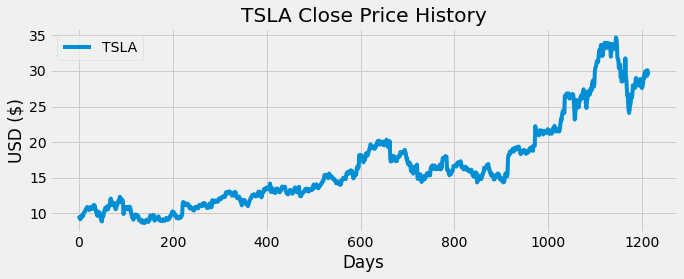

In [30]:
#Visualisation dans un graphe bi-dimensionnel
#initialisation de la taille de la figure
plt.figure(figsize=(10, 3.5))
#Visualisation du Close price
plt.plot(TSLA['Close'], label='TSLA')
#Titre
plt.title('TSLA Close Price History')
#X et Y legendde
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
#Visualisation
plt.show

Vu que le bruit des valeurs est eleve, on procedera avec les valeurs des moyennes mobiles.
SMA simple 

In [31]:
#Creation d'un DataFrame
SMA30 = pd.DataFrame()
print(SMA30.head())
SMA30['Close'] = TSLA['Close'].rolling(30, min_periods=1, center=False).mean()
SMA30

Empty DataFrame
Columns: []
Index: []


,Close
0,9.314500
1,9.406250
2,9.370500
3,9.323500
4,9.322500
...,...
1209,28.522166
1210,28.566566
1211,28.648466
1212,28.710783


SMA sur 80 jours

In [32]:
SMA80 = pd.DataFrame()
SMA80['Close'] = TSLA['Close'].rolling(80, min_periods=1, center=False).mean()
SMA80

,Close
0,9.314500
1,9.406250
2,9.370500
3,9.323500
4,9.322500
...,...
1209,29.485294
1210,29.428300
1211,29.389106
1212,29.344800


On va ainsi visualiser les 3 courbes :
. TSLA 
. SMA30
. SMA80

1.   Élément de liste
2.   Élément de liste



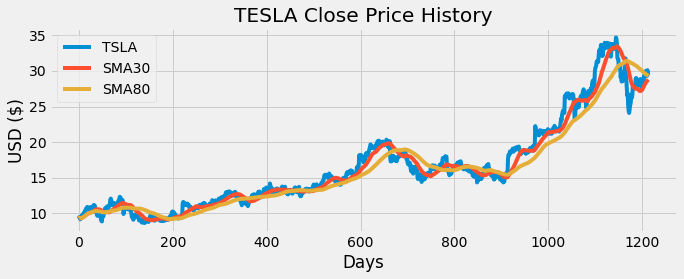

In [33]:
plt.figure(figsize=(10, 3.5))
plt.plot(TSLA['Close'], label='TSLA')
plt.plot(SMA30['Close'], label="SMA30")
plt.plot(SMA80['Close'], label="SMA80")
plt.title('TESLA Close Price History')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

LES SIGNAUX: UP AND DOWN

In [34]:
signals = pd.DataFrame(index=TSLA.index)
signals['signal'] = 0.0
signals['SMA30'] = SMA30['Close']
signals['SMA80'] = SMA80['Close']
signals['signal'][30:] = np.where(signals['SMA30'][30:] > signals['SMA80'][30:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
signals

,signal,SMA30,SMA80,positions
0,0.0,9.314500,9.314500,NaN
1,0.0,9.406250,9.406250,0.0
2,0.0,9.370500,9.370500,0.0
3,0.0,9.323500,9.323500,0.0
4,0.0,9.322500,9.322500,0.0
...,...,...,...,...
1209,0.0,28.522166,29.485294,0.0
1210,0.0,28.566566,29.428300,0.0
1211,0.0,28.648466,29.389106,0.0
1212,0.0,28.710783,29.344800,0.0


<Figure size 432x288 with 0 Axes>

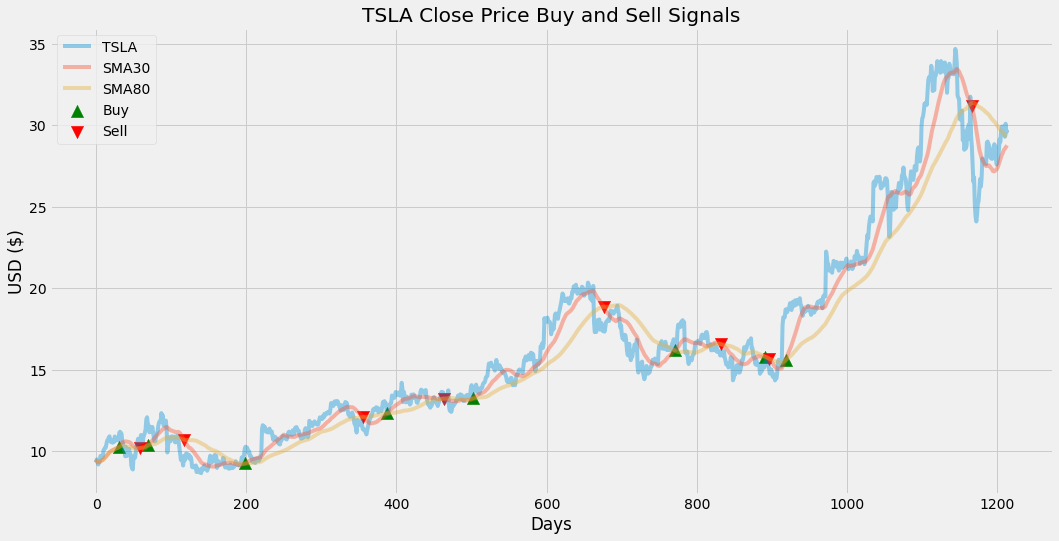

In [35]:
fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.plot(TSLA['Close'], label='TSLA',alpha=0.4)
plt.plot(signals['SMA30'], label="SMA30",alpha=0.4)
plt.plot(signals['SMA80'], label="SMA80",alpha=0.4)
plt.scatter(signals.loc[signals.positions == 1.0].index, signals.SMA30[signals.positions == 1.0], label="Buy", marker="^", s = 150, color='green')
plt.scatter(signals.loc[signals.positions == -1.0].index, signals.SMA30[signals.positions == -1.0], label="Sell", marker="v", s = 150, color='red')
plt.title('TSLA Close Price Buy and Sell Signals')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

Backtesting the Strategy

In [36]:
# Set the initial capital
initial_capital= float(10000.0)
# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)
# Buy a 100 shares
positions['TSLA'] = 100*signals['signal']   
# Initialize the portfolio with value owned   
portfolio = positions.multiply(TSLA['Adj Close'], axis=0)
# Store the difference in shares owned 
pos_diff = positions.diff()
# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(TSLA['Adj Close'], axis=0)).sum(axis=1)
# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(TSLA['Adj Close'], axis=0)).sum(axis=1).cumsum()   
# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

<Figure size 432x288 with 0 Axes>

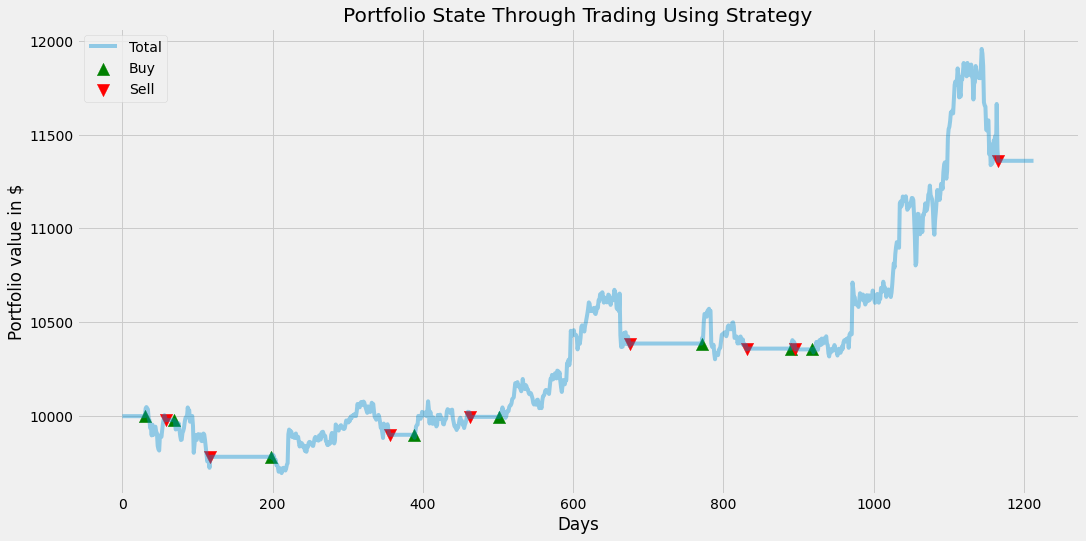

In [37]:
fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.plot(portfolio['total'], label='Total',alpha=0.4)
plt.scatter(portfolio.loc[signals.positions == 1.0].index, portfolio.total[signals.positions == 1.0], label="Buy", marker="^", s = 150, color='green')
plt.scatter(portfolio.loc[signals.positions == -1.0].index, portfolio.total[signals.positions == -1.0], label="Sell", marker="v", s = 150, color='red')
plt.title('Portfolio State Through Trading Using Strategy')
plt.xlabel('Days')
plt.ylabel('Portfolio value in $')
plt.legend(loc='upper left')
plt.show()

Le ratio de Sharpe mesure l'écart de rentabilité d'un portefeuille d'actifs financiers par rapport au taux de rendement d'un placement sans risque, divisé par un indicateur de risque, l'écart type de la rentabilité de ce portefeuille, autrement dit sa volatilité.

In [38]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.5849093528193829
